# Lecture 5

Now that we are briefed with the basics of linear algebra, we are ready to dive deeper into Linear Programming.

---

## Definition 

  Linear Programming involves a linear objective function and a set of linear constraints, i.e., the objective function and constraints are expressed as linear combination of decision variables.

  For instance, the following problem is a linear optimisation problem,

  Objective: 

  $$
  \min_{x_1,x_2} \ f(x_1, x_2) = c_1x_1 + c_2x_2 
  $$

  Subject to: 

  $$
  \begin{aligned}
  & a_{11}x_1 + a_{12}x_2 \geq b_1 \\
  & a_{21}x_1 + a_{22}x_2 \geq b_2 \\
  & a_{31}x_1 + a_{32}x_2 \geq b_3 \\
  & x_1, x_2 \geq 0
  \end{aligned}
  $$

  However, the following problem is not a linear optimisation problem,

  Objective: 

  $$
  \min_{x_1,x_2} \ f(x_1, x_2) = c_1x_1 + c_2 x_2 + c_3x_1x_2
  $$

  Subject to: 

  $$
  \begin{aligned}
  & a_{11}x_1 + a_{12}x_2 \geq b_1 \\
  & a_{21}x_1 + a_{22}x_2 \geq b_2 \\
  & a_{31}x_1 + a_{32}x_2 \geq b_3 \\
  & x_1, x_2 \geq 0
  \end{aligned}
  $$

  And neither is this,

  Objective: 

  $$
  \min_{x_1,x_2} \ f(x_1, x_2) = c_1x_1 + c_2 x_2
  $$

  Subject to: 

  $$
  \begin{aligned}
  & a_{11}x_1 + a_{12}x_2 + a_{13}x_1x_2 \geq b_1 \\
  & a_{21}x_1 + a_{22}x_2 + a_{23}x_1x_2 \geq b_2 \\
  & a_{31}x_1 + a_{32}x_2 + a_{33}x_1x_2 \geq b_3 \\
  & x_1, x_2 \geq 0
  \end{aligned}
  $$

  Thus, a general linear optimisation problem can be expressed as,

  Objective:
  
  $$
  \min_{\mathbf{x}} \ f(\mathbf{x}) = c_1x_1 + c_2x_2 + ... + c_mx_m
  $$

  Subject to:

  $$
  \begin{aligned}
  & a_{11}x_1 + a_{12}x_2 + ... + a_{1m}x_m \geq b_1 \\
  & a_{21}x_1 + a_{22}x_2 + ... + a_{2m}x_m = b_2 \\
  & ... \\
  & a_{n1}x_1 + a_{n2}x_2 + ... + a_{nm}x_m \geq b_n \\
  & x_i \geq 0 \ \forall \ i \in [1,m] 
  \end{aligned}
  $$

  Here, $f(\mathbf{x})$ is the objective function, $x_i$ is a decision variable, $a_{i1}x_1 + a_{i2}x_2 + ... + a_{im}x_m \geq/= b_i$ is a technological constraint, and $x_i \geq 0$ is a domain constriant. Thus, the set of values of the decision variables that satisfy these constraints constitute the feasible region; hence, any value in this region is referred to as a feasible value; and therefore, the value in this feasible region that optimises the objective function is called the optimal solution.

  ## Example
  Consider a textile firm operating in Kochi. This company needs to ship 100 tons of textile goods from Kanchipuram and can rent two types of trucks: T1 and T2. Each truck of type T1 can carry 10 tons of goods and costs ₹5000 per trip, while each truck of type T2 can carry 20 tons and costs ₹8000 per trip. Thus, how many T1 and T2 type trucks should the company deploy so as to minimize the total costs?

  Obective:

  $$
  \min_{x_1, x_2} \ Z = 5000x_1 + 8000x_2
  $$

  Subject to:

  $$
  \begin{aligned}
    & 10x_1 + 20x_2 \geq 100 \\
    & x_1, x_2 \geq 0
  \end{aligned}
  $$

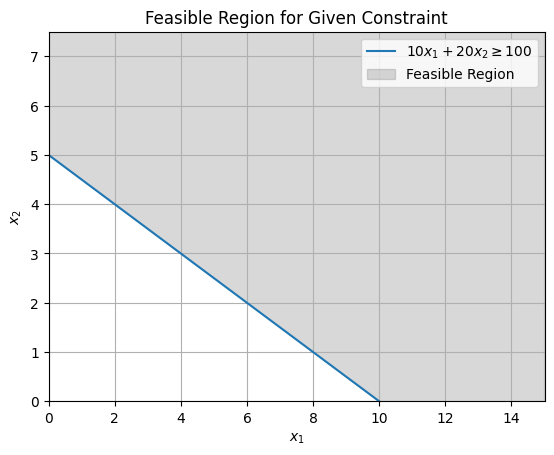

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Define the constraint coefficients
a, b, c = 10, 20, 100  # Coefficients for the constraint (a * x1 + b * x2 >= c)

# Define the range for x1 and x2
x1 = np.linspace(0, c/a, 100) 
x2 = (c - a * x1) / b

# Define the feasible region
x_3 = np.linspace(0, 1.5 * (c/a), 100)
x_4 = (c - a * x_3) / b

# Plot the constraint line and the feasible region
plt.plot(x1, x2, label=rf'${a}x_1 + {b}x_2 \geq {c}$')
plt.fill_between(x_3, max(x_4) * 1.5, x_4, color='grey', alpha=0.3, label="Feasible Region")

# Set plot limits and labels
plt.xlim(0, 1.5 * max(x1))
plt.ylim(0, 1.5 * max(x2))
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

# Display the constraint as a line
plt.legend()
plt.title("Feasible Region for Given Constraint")
plt.grid(True)
plt.show()


  What if the management imposes an upper limit of 20 trucks considering the managerial capacity of the company?

  Obective:

  $$
  \min_{x_1, x_2} \ Z = 5000x_1 + 8000x_2
  $$

  Subject to:

  $$
  \begin{aligned}
    & 10x_1 + 20x_2 \geq 100 \\
    & x_1 + x_2 \leq 20 \\
    & x_1, x_2 \geq 0
  \end{aligned}
  $$

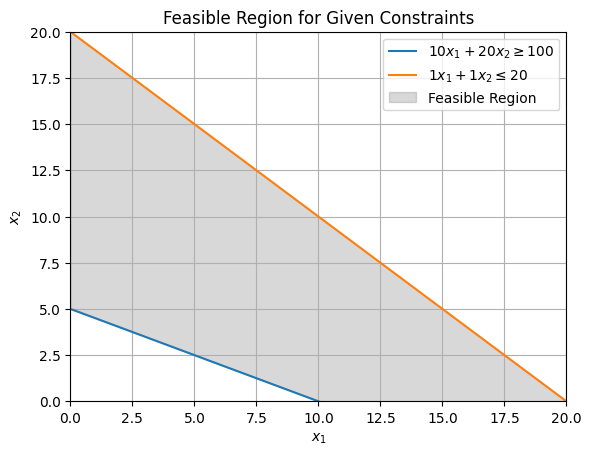

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for coefficients
a1, b1, c1 = 10, 20, 100  # Coefficients for constraint a1*x1 + b1*x2 >= c1
a2, b2, c2 = 1, 1, 20     # Coefficients for constraint a2*x1 + b2*x2 <= c2

# Define the constraints
x1 = np.linspace(0, max(c1/a1, c2/a2), 100)
x2_1 = (c1 - a1 * x1) / b1  # from a1*x1 + b1*x2 >= c1
x2_2 = (c2 - a2 * x1) / b2  # from a2*x1 + b2*x2 <= c2

# Plot the feasible region
plt.plot(x1, x2_1, label=fr'${a1}x_1 + {b1}x_2 \geq {c1}$')
plt.plot(x1, x2_2, label=fr'${a2}x_1 + {b2}x_2 \leq {c2}$')

# Fill the feasible region where both constraints are met
plt.fill_between(x1, np.maximum(x2_1, 0), x2_2, where=(x2_1 <= x2_2) & (x2_2 >= 0), color='grey', alpha=0.3, label="Feasible Region")

# Set plot limits and labels
plt.xlim(0, max(c1/a1, c2/a2))
plt.ylim(0, max(c1/b1, c2/b2))
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

# Display the constraints as lines
plt.legend()
plt.title("Feasible Region for Given Constraints")
plt.grid(True)
plt.show()



  ## Assumptions
  1. Proportionality - The contribution of each decision variable to the objective function and constraints is poroportional to the value of the variable.
  2. Additivity - The contribution of each decision variable to the objective function and constraints is independent of the values of other decision variables.
  3. Divisibility - The decision variables are allowed to take fractional values.
  4. Certainty - All the parameters are known with certainty.